**Import Libraries**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix

**Load Data**

In [3]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Study Features**

In [4]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.0984466,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.0968008,0.210013,-0.168814,0.276326,0.0680014,-0.225439
sex,-0.0984466,1,-0.0493529,-0.0567688,-0.197912,0.0450318,-0.0581963,-0.0440199,0.141664,0.0960929,-0.0307106,0.118261,0.210041,-0.280937
cp,-0.068653,-0.0493529,1,0.0476078,-0.0769044,0.094444,0.0444206,0.295762,-0.39428,-0.14923,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.0567688,0.0476078,1,0.123174,0.177531,-0.114103,-0.0466977,0.0676161,0.193216,-0.121475,0.101389,0.0622099,-0.144931
chol,0.213678,-0.197912,-0.0769044,0.123174,1,0.0132936,-0.15104,-0.00993984,0.0670228,0.0539519,-0.00403777,0.0705109,0.098803,-0.0852391
fbs,0.121308,0.0450318,0.094444,0.177531,0.0132936,1,-0.0841891,-0.00856711,0.0256651,0.00574722,-0.0598942,0.137979,-0.0320193,-0.0280458
restecg,-0.116211,-0.0581963,0.0444206,-0.114103,-0.15104,-0.0841891,1,0.0441234,-0.0707329,-0.0587702,0.0930448,-0.0720424,-0.0119814,0.13723
thalach,-0.398522,-0.0440199,0.295762,-0.0466977,-0.00993984,-0.00856711,0.0441234,1,-0.378812,-0.344187,0.386784,-0.213177,-0.0964391,0.421741
exang,0.0968008,0.141664,-0.39428,0.0676161,0.0670228,0.0256651,-0.0707329,-0.378812,1,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.0960929,-0.14923,0.193216,0.0539519,0.00574722,-0.0587702,-0.344187,0.288223,1,-0.577537,0.222682,0.210244,-0.430696


**Convert categorical variable into dummy/indicator variables**

In [5]:
cp = pd.get_dummies(data['cp'], prefix = "cp", drop_first=True)
thal = pd.get_dummies(data['thal'], prefix = "thal" , drop_first=True)
slope = pd.get_dummies(data['slope'], prefix = "slope", drop_first=True)
new_data = pd.concat([data, cp, thal, slope], axis=1)
new_data.drop(['cp', 'thal', 'slope'], axis=1, inplace=True)
new_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


**Drop Features**

In [6]:
dataset = new_data.drop(['chol', 'fbs'], axis=1)
dataset.head()

,age,sex,trestbps,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


**Split Data into Features and labels**

In [7]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print('shape of X: ',X.shape)

shape of X:  (303, 16)


**split features into train and test**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Standardization**

In [9]:
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

**Finding best parameters for Logistic Regression using Grid Search**

In [34]:
log_reg = LogisticRegression(random_state=0) 
parameters = [{"C":[0.07, 0.08, 0.1, 0.3, 0.5, 0.9, 1], "penalty":["l1","l2"]}]     # l1 lasso l2 ridge
grid_search = GridSearchCV(estimator = log_reg, param_grid = parameters,        
                           cv = 10, n_jobs =  -1)                                   # Instantiate Grid Search model
 
grid_search = grid_search.fit(X_train, y_train)                                     # Train Grid Search model

print("best accuracy is :" , grid_search.best_score_)                               # Display best accuracy

grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

best accuracy is : 0.9668333333333333


{'C': 0.07, 'penalty': 'l2'}

**Build, train and test model**

Train Accuracy score :  0.9752066115702479
Test Accuracy score :  0.9508196721311475


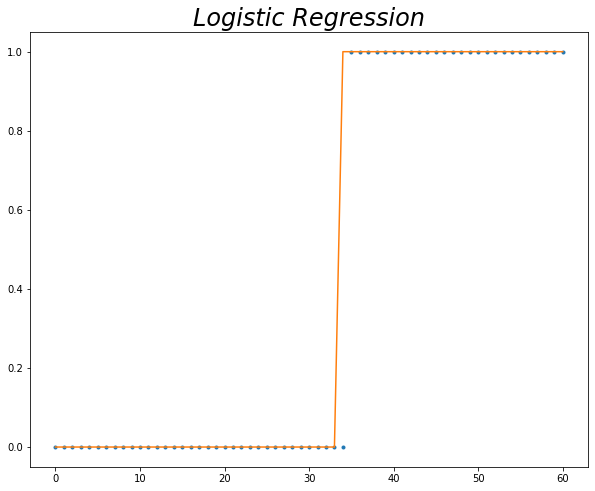

In [10]:
log_reg = LogisticRegression(C=1, penalty='l2', random_state=0)     # Instantiate Logistic Regression model
log_reg.fit(X_train, y_train)                                       # Train the model
print('Train Accuracy score : ', accuracy_score(y_train, log_reg.predict(X_train))) # Display train accuracy of the model
print('Test Accuracy score : ', accuracy_score(y_test, log_reg.predict(X_test)))  # Display test accuracy of the model
plt.figure(figsize=(10,8))
plt.title('Logistic Regression', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test), '.', np.sort(log_reg.predict(X_test)), '-')        # Plotting y_predicted vs y_actual

**Display Confusion Matrix of Logistic Regression model**

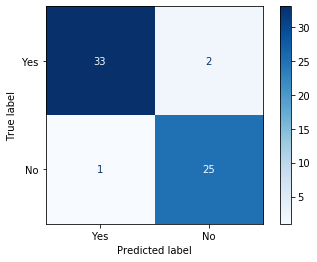

In [11]:
disp = plot_confusion_matrix(log_reg, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

**Finding best parameters for KNN using Grid Search**

In [42]:
KNC = KNeighborsClassifier()
parameters = [{'n_neighbors': np.arange(16)}]                               # Set parameters of the model


grid_search = GridSearchCV(estimator = KNC, param_grid = parameters,        
                           cv = 5, n_jobs =  -1)                            # Instantiate Grid Search model              
 
grid_search = grid_search.fit(X_train, y_train)                             # Train Grid Search model

print("best accuracy is :" , grid_search.best_score_)                       # Display best accuracy

grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

best accuracy is : 0.9092687074829933


{'n_neighbors': 8}

**Build, train and test model**

train accuracy 0.9214876033057852
test accuracy 1.0


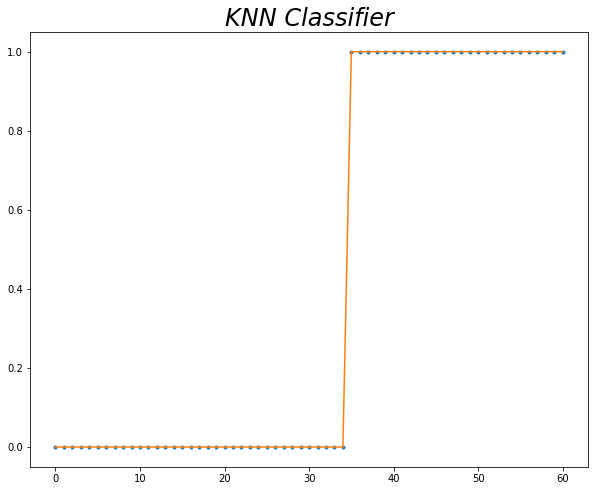

In [12]:
KNC = KNeighborsClassifier(n_neighbors=8)                               # Instantiate KNN model
KNC.fit(X_train, y_train)                                               # Train KNN model
print('train accuracy', KNC.score(X_train, y_train))                    # Display train accuracy
print('test accuracy', KNC.score(X_test, KNC.predict(X_test)))          # Display test accuracy
plt.figure(figsize=(10,8))
plt.title('KNN Classifier', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test), '.', np.sort(KNC.predict(X_test)), '-')       # Plotting y_predicted vs y_actual

**Display Confusion Matrix of KNN model**

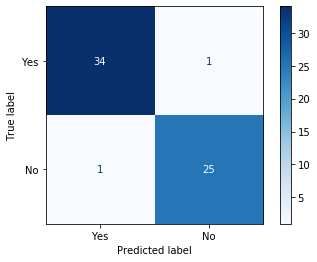

In [13]:
disp = plot_confusion_matrix(KNC, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

**Finding best parameters for SVM using Grid Search**

In [73]:
parameters = [{'C': np.arange(16), 'kernel': ['linear', 'rbf'],
               'gamma': [0.05, 0.1, 0.2, 0.3, 0.5, 1]}]                   # Set parameters of the model
SVM_cl = SVC(random_state=0)                                              # Instantiate SVM model     
grid_search = GridSearchCV(estimator = SVM_cl, param_grid = parameters,        
                           cv = 10, n_jobs =  -1)                           # Instantiate Grid Search model
 
grid_search = grid_search.fit(X_train, y_train)                                     # Train Grid Search model

print("best accuracy is :" , grid_search.best_score_)                               # Display best accuracy

grid_search.best_params_ # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

best accuracy is : 0.9628333333333334


{'C': 1, 'gamma': 0.05, 'kernel': 'linear'}

**Build, train and test model**

train accuracy 0.9752066115702479
test accuracy 1.0


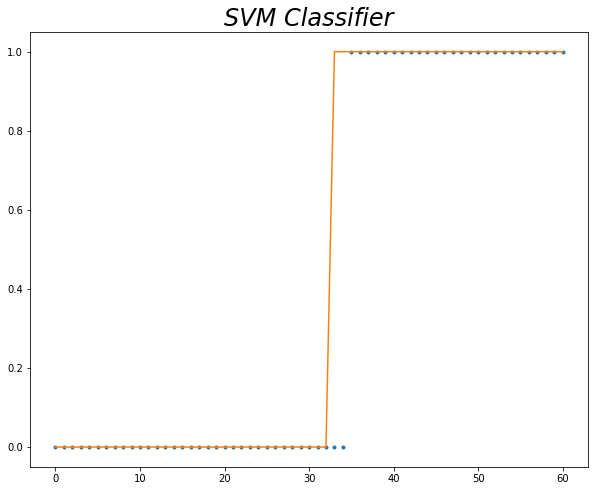

In [14]:
SVM_cl = SVC(C=1, kernel='linear', gamma=0.05, random_state=0)              # Instantiate SVM model 
SVM_cl.fit(X_train, y_train)                                                # Train SVM model
print('train accuracy', SVM_cl.score(X_train, y_train))                     # Display train accuracy
print('test accuracy', SVM_cl.score(X_test, SVM_cl.predict(X_test)))        # Display test accuracy
plt.figure(figsize=(10,8))
plt.title('SVM Classifier', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test), '.', np.sort(SVM_cl.predict(X_test)), '-')       # Plotting y_predicted vs y_actual

**Display Confusion Matrix of SVM model**

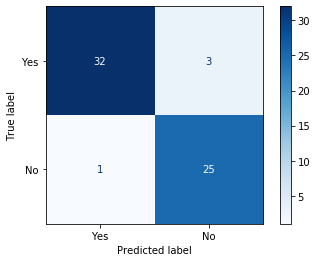

In [15]:
disp = plot_confusion_matrix(SVM_cl, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

**Finding best parameters for Decision Tree using Grid Search**

In [76]:
DT = DecisionTreeClassifier(random_state=0)                                      # Instantiate Decision Tree model
parameters = [{'max_depth': np.arange(16), 'min_samples_leaf': np.arange(16), 
               'criterion' : ['gini', 'entropy']}]                                   # Set parameters of the model


grid_search = GridSearchCV(estimator = DT, param_grid = parameters,        
                           cv = 10, n_jobs =  -1)                                  # Instantiate Grid Search model
 
grid_search = grid_search.fit(X_train, y_train)                                     # Train Grid Search model

print("best accuracy is :" , grid_search.best_score_)                               # Display best accuracy

grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

best accuracy is : 0.9628333333333334


{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}

**Build, train and test model**

train accuracy 0.9628099173553719
test accuracy 1.0


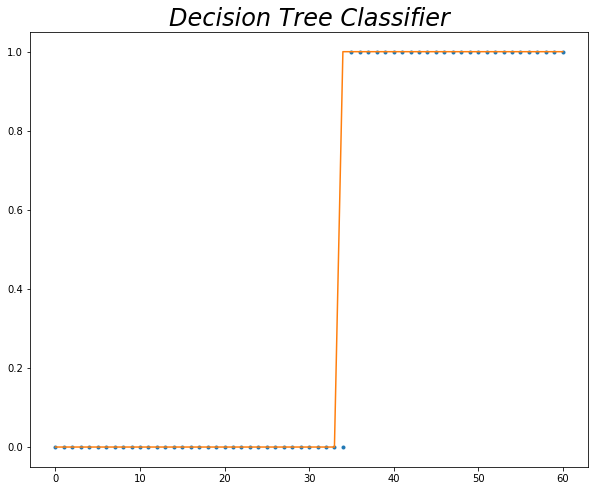

In [16]:
DT = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1,
                            criterion='gini', random_state=0)          # Instantiate Decision Tree model
DT.fit(X_train, y_train)                                                        # Train Random Forest model
print('train accuracy', DT.score(X_train, y_train))                             # Display train accuracy
print('test accuracy', DT.score(X_test, DT.predict(X_test)))                    # Display test accuracy
plt.figure(figsize=(10,8))
plt.title('Decision Tree Classifier', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test), '.', np.sort(DT.predict(X_test)), '-')            # Plotting y_predicted vs y_actual

**Display Confusion Matrix of Decision Tree model**

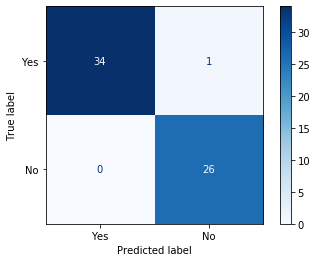

In [17]:
disp = plot_confusion_matrix(DT, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

**Finding best parameters for Random Forest using Grid Search**

In [79]:
param_grid = {
    'max_depth': [14, 15, 17],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [200, 300, 500]}                     # Set parameters of the model
RF = RandomForestClassifier(random_state=0)                             # Instantiate Random Forest model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1)          # Instantiate Grid Search model
grid_search = grid_search.fit(X_train, y_train)                      # Train Grid Search model

print("best accuracy is :" , grid_search.best_score_)                # Display best accuracy

grid_search.best_params_    # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   46.2s finished


best accuracy is : 0.9465136054421768


{'max_depth': 14,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

**Build, train and test model**

train accuracy 0.9669421487603306
test accuracy 1.0


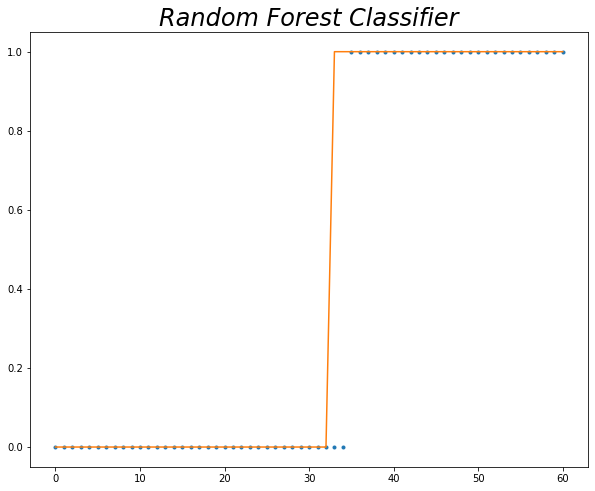

In [18]:
RF_clf = RandomForestClassifier(n_estimators=200, max_depth=14,
                                min_samples_leaf=3, min_samples_split=4,
                                random_state=0)                             # Instantiate Random forest model
RF_clf.fit(X_train, y_train)                                                # Train Random Forest model
print('train accuracy', RF_clf.score(X_train, y_train))                     # Display train accuracy
print('test accuracy', RF_clf.score(X_test, RF_clf.predict(X_test)))        # Display test accuracy
plt.figure(figsize=(10,8))
plt.title('Random Forest Classifier', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test), '.', np.sort(RF_clf.predict(X_test)), '-')        # Plotting y_predicted vs y_actual

**Display Confusion Matrix of Random Forest Classifier model**

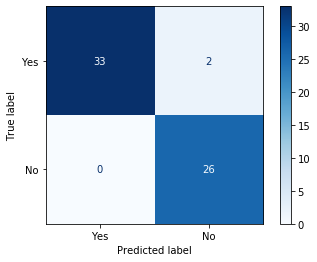

In [19]:
disp = plot_confusion_matrix(RF_clf, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

**Finding best parameters for AdaBoost by Grid Search**

In [100]:
param_grid = {
    'n_estimators': [100, 200, 300,400],
    'learning_rate': [0.005, 0.01, 0.03, 0.05, 0.1]}     # Set parameters of the model
AB = AdaBoostClassifier(random_state=0)                     # Instantiate AdaBoost Classifier model
grid_search = GridSearchCV(estimator = AB, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose=2)             # Instantiate Grid Search model
grid_search = grid_search.fit(X_train, y_train)                       # Train Gird Search model
print("best accuracy is :" , grid_search.best_score_)                 # Display best accuracy
grid_search.best_params_    # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   17.5s finished


best accuracy is : 0.9545


{'learning_rate': 0.005, 'n_estimators': 200}

**Build, train and test the model**

train accuracy 0.9628099173553719
test accuracy 1.0


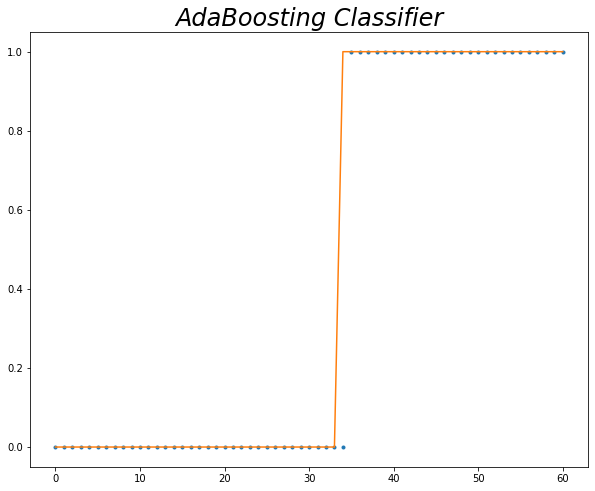

In [20]:
AB = AdaBoostClassifier(n_estimators=200 ,
                        learning_rate=0.005, random_state=0)         # Instantiate AdaBoost Classifier model
AB.fit(X_train, y_train)                                             # Train Adaboost Classifier model
print('train accuracy', AB.score(X_train, y_train))                  # Display train accuracy
print('test accuracy', AB.score(X_test, AB.predict(X_test)))         # display test accuracy
plt.figure(figsize=(10,8))
plt.title('AdaBoosting Classifier', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test), '.', np.sort(AB.predict(X_test)), '-')     # Plotting y_predicted vs y_actual

**Display Confusion Matrix of AdaBoost Classifier model**

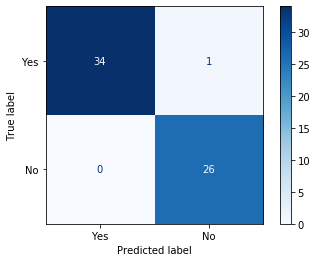

In [21]:
disp = plot_confusion_matrix(AB, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

**Finding best parameters for Gradient Boosting Regressor by Grid Search**

In [105]:
GB = GradientBoostingClassifier(random_state=0)             # Instantiate Gradient Boosting Classifier model
param = {"n_estimators"     : [100, 200, 300],
         "max_depth"        : [5, 8, 12, 20],
         "min_samples_leaf" : [4, 8, 12, 15],
         "learning_rate"    : [0.5, 0.7, 0.9],
         "max_features"     : [1, 3, 4, 6]}                                 # Set parameters of the model
grid_search = GridSearchCV(estimator = GB, param_grid = param, 
                          cv = 10, n_jobs = -1, verbose = 2)               # Instantiate Grid Search model
grid_search = grid_search.fit(X_train, y_train)                           # Train Gird Search model

print("best accuracy is :" , grid_search.best_score_)                     # Display best accuracy             

grid_search.best_params_     # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  2.0min


best accuracy is : 0.9545


[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.3min finished


{'learning_rate': 0.9,
 'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 12,
 'n_estimators': 100}

**Build, train and test the model**

train accuracy 1.0
test accuracy 1.0


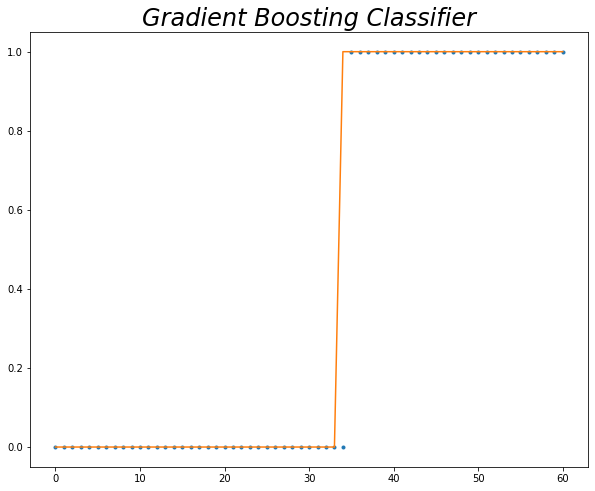

In [22]:
GB_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.9,
                                    min_samples_leaf=12, max_depth=8,
                                    max_features=6, random_state=0) # Instantiate Gradient Boosting Classifier model
GB_clf.fit(X_train, y_train)                                        # Train XG Boost Classifier model
print('train accuracy', GB_clf.score(X_train, y_train))               # Display train accuracy
print('test accuracy', GB_clf.score(X_test, GB_clf.predict(X_test)))   # Display test accuracy
plt.figure(figsize=(10,8))
plt.title('Gradient Boosting Classifier', fontsize=24 , fontstyle='italic')
plt.plot(np.sort(y_test), '.', np.sort(GB_clf.predict(X_test)), '-')    # Plotting y_predicted vs y_actual

**Display Confusion Matrix of Gradient Boost Classifier model**

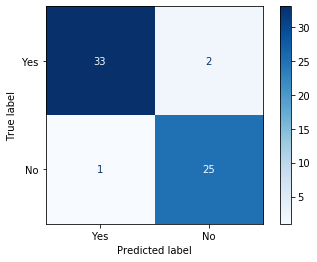

In [23]:
disp = plot_confusion_matrix(GB_clf, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

**Finding best parameters for XGBoost by Grid Search**

In [120]:
XG = XGBClassifier(random_state=0)                           # Instantiate XG Boost Classifier model
param = {"n_estimators"     : [100, 200,300],
         "learning_rate"    : [0.1, 0.3, 0.5, 0.6],
         "max_depth"        : [2, 3, 4, 5],
         "min_child_weight" : [1, 2, 3, 4],
         "gamma"            : [0.5, 0.8, 0.9, 1],
         "colsample_bytree" : [0.7, 0.8],
         "subsample"        : [0.7, 0.8],
         }                                                        # Set parameters of the model          
grid_search = GridSearchCV(estimator = XG, param_grid = param, 
                          cv = 5, n_jobs = -1, verbose = 2)          # Instantiate Grid Search model
grid_search = grid_search.fit(X_train, y_train)                      # Train Gird Search model

print("best accuracy is :" , grid_search.best_score_)                # Display best accuracy

grid_search.best_params_    # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric

Fitting 5 folds for each of 3072 candidates, totalling 15360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 607 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1825 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 3523 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 5713 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 8383 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 11545 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 15187 tasks      | elapsed:  2.2min


best accuracy is : 0.9630952380952381


[Parallel(n_jobs=-1)]: Done 15360 out of 15360 | elapsed:  2.2min finished


{'colsample_bytree': 0.7,
 'gamma': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

**Build, train and test the model**

train accuracy 0.9793388429752066
test accuracy 0.9836065573770492


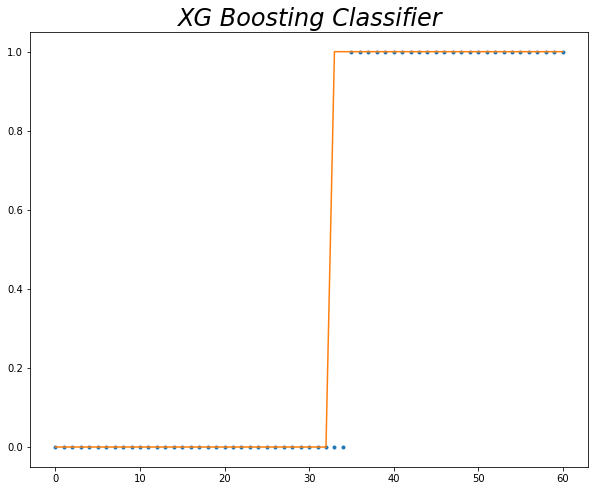

In [24]:
XGB = XGBClassifier(n_estimators=100, gamma=0.8, learning_rate=0.1,
                      max_depth=5, min_child_weight=1, subsample=0.7,
                      colsample_bytree=0.7, random_state=0)                 # Instantiate XG Boost Classifier model
XGB.fit(X_train, y_train)                                                   # Train XG Boost Classifier model
print('train accuracy', XGB.score(X_train, y_train))                        # Display train accuracy
print('test accuracy', XGB.score(X_test, GB_clf.predict(X_test)))           # Display test accuracy
plt.figure(figsize=(10,8))
plt.title('XG Boosting Classifier', fontsize=24 , fontstyle='italic')                                           
plt.plot(np.sort(y_test), '.', np.sort(XGB.predict(X_test)), '-')           # Plotting y_predicted vs y_actual

**Display Confusion Matrix of XGBoost model**

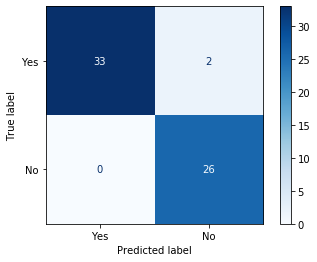

In [25]:
disp = plot_confusion_matrix(XGB, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)